# Pulling out investigation

In [1]:
import os
print(os.getcwd())

c:\Users\New User\Documents\GitHub\text_to_discocirc


In [2]:
from lambeq import BobcatParser
parser = BobcatParser(verbose='suppress')

c:\Users\New User\PY-VENVS\discocirc-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
from discocirc.expr.ccg_to_expr import ccg_to_expr
from discocirc.expr.to_discopy_diagram import expr_to_diag
from discocirc.expr.s_type_expand import s_type_expand
from discocirc.diag.frame import Frame
decompose_functor = Frame.get_decompose_functor()
from discocirc.expr.pull_out import pull_out
from discocirc.expr.to_discopy_diagram import expr_to_frame_diag

A basic example, requiring vanilla 'B combinator' pulling out

In [4]:
print(parser.sentence2tree("I really like Bob").deriv())

I    really      like    Bob
═  ═══════════  ═══════  ═══
n  (s\n)/(s\n)  (s\n)/n   n 
                         <U>
                          n 
                ───────────>
                    s\n     
   ────────────────────────>
              s\n           
───────────────────────────<
             s              


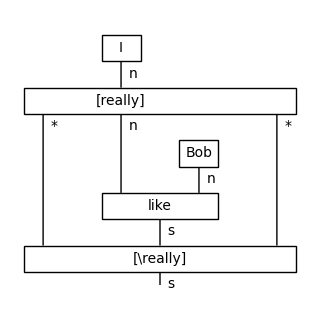

In [5]:
expr = ccg_to_expr(parser.sentence2tree("I really like Bob"))
decompose_functor(expr_to_diag(expr)).draw(figsize=(3,3))

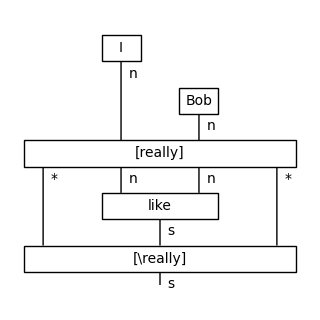

In [6]:
decompose_functor(expr_to_diag(pull_out(expr))).draw(figsize=(3,3))

Let's look for an example that requires the C combinator

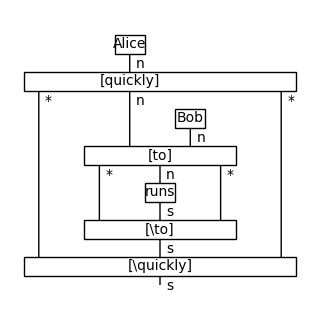

                                to              Bob                
                     ═════════════════════════  ═══                
                     (n → ((n → s) → (n → s)))   n    runs         
                     ──────────────────────────────  ═══════       
      quickly             ((n → s) → (n → s))        (n → s)       
═══════════════════  ───────────────────────────────────────       
((n → s) → (n → s))                  (n → s)                  Alice
────────────────────────────────────────────────────────────  ═════
                          (n → s)                               n  
───────────────────────────────────────────────────────────────────
                                 s                                 

In [7]:
expr = ccg_to_expr(parser.sentence2tree("Alice quickly runs to Bob"))
decompose_functor(expr_to_diag(expr)).draw(figsize=(3,3))
expr

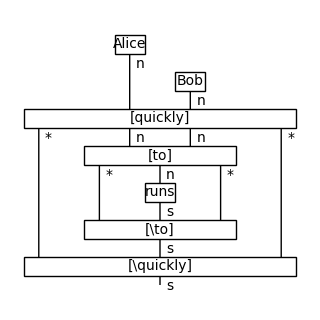

                                            to               runs              
                                 ═════════════════════════  ═══════            
            quickly              ((n → s) → (n → (n → s)))  (n → s)            
═══════════════════════════════  ──────────────────────────────────            
((n → (n → s)) → (n → (n → s)))            (n → (n → s))             Bob       
───────────────────────────────────────────────────────────────────  ═══       
                           (n → (n → s))                              n   Alice
────────────────────────────────────────────────────────────────────────  ═════
                                (n → s)                                     n  
───────────────────────────────────────────────────────────────────────────────
                                       s                                       

In [8]:
decompose_functor(expr_to_diag(pull_out(expr))).draw(figsize=(3,3))
pull_out(expr)

An example that necessitates a 'higher' C combinator (in this case, C2)

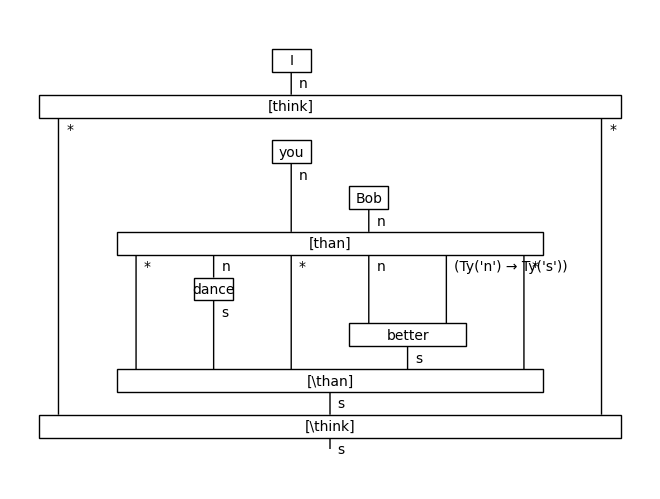

                                     than                         Bob                                      
               ═════════════════════════════════════════════════  ═══                                      
               (n → (((n → s) → (n → s)) → ((n → s) → (n → s))))   n         better                        
               ──────────────────────────────────────────────────────  ═══════════════════                 
                    (((n → s) → (n → s)) → ((n → s) → (n → s)))        ((n → s) → (n → s))   dance         
               ───────────────────────────────────────────────────────────────────────────  ═══════        
                                           ((n → s) → (n → s))                              (n → s)  you   
               ────────────────────────────────────────────────────────────────────────────────────  ═══   
    think                                            (n → s)                                          n    
═════════════  ─────────────

In [13]:
text = 'I think you dance better than Bob'
expr = ccg_to_expr(parser.sentence2tree(text))
expr_to_frame_diag(expr).draw()
expr

Note in the expr tree above, 'Bob' is separated from 'you' by two non-noun leaves ('dance' and 'better').
This means we would require at least a n=2 generalized C combinator to pull 'Bob' out of 'think'

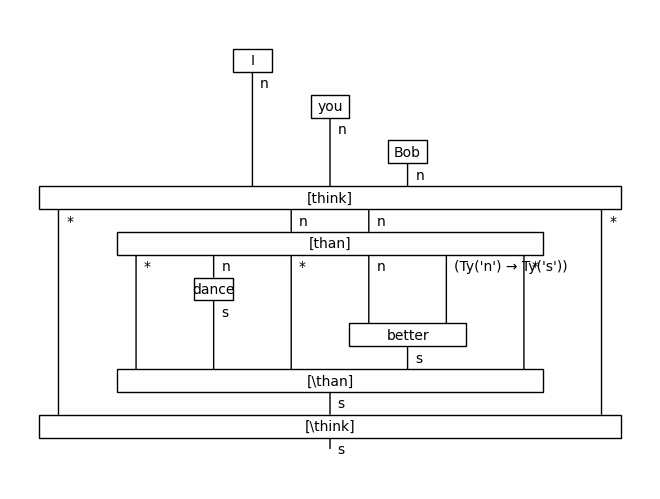

                                                             than                               better                             
                                       ═════════════════════════════════════════════════  ═══════════════════                      
                                       (((n → s) → (n → s)) → ((n → s) → (n → (n → s))))  ((n → s) → (n → s))   dance              
                                       ──────────────────────────────────────────────────────────────────────  ═══════             
                think                                        ((n → s) → (n → (n → s)))                         (n → s)             
═════════════════════════════════════  ───────────────────────────────────────────────────────────────────────────────             
((n → (n → s)) → (n → (n → (n → s))))                                   (n → (n → s))                                   Bob        
────────────────────────────────────────────────────────────────────────────

In [15]:
pulled_expr = pull_out(expr)
expr_to_frame_diag(pulled_expr).draw()
pulled_expr